In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd /home/av/gitprojects/yolox/

/home/av/gitprojects/yolox


In [9]:
from tools.train import *
import mmcv
print('Num of devices:', torch.cuda.device_count())

Num of devices: 1


# Hyps

In [10]:
parser = make_parser()
args = mmcv.Config(parser.parse_known_args()[0].__dict__)

args.exp_file = './exps/rotated/nano_dota.py'
args.experiment_name = 'nano-test'
args.devices = 1
args.batch_size = 4
args.occupy = False
args.output_dir = f'./work_dir/{args.name}'

# Model

In [11]:
exp = get_exp(args.exp_file, args.name)
exp.data_num_workers = 0
exp.merge(args.opts)


In [12]:
from avcv.utils import timeit

In [14]:
from yolox.data import DataPrefetcher
loader = exp.get_data_loader(3, False)
prefetcher = DataPrefetcher(loader)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Time log:
	t0: 0.00168 seconds, 0.73 %
	t1: 0.18297 seconds, 79.16 %
	t2: 0.04639 seconds, 20.07 %
	t3: 0.00010 seconds, 0.04 %



In [15]:
dl = iter(loader)
ds =  loader.dataset
item = ds[0]

In [17]:
batch = prefetcher.next()

(3, 1)


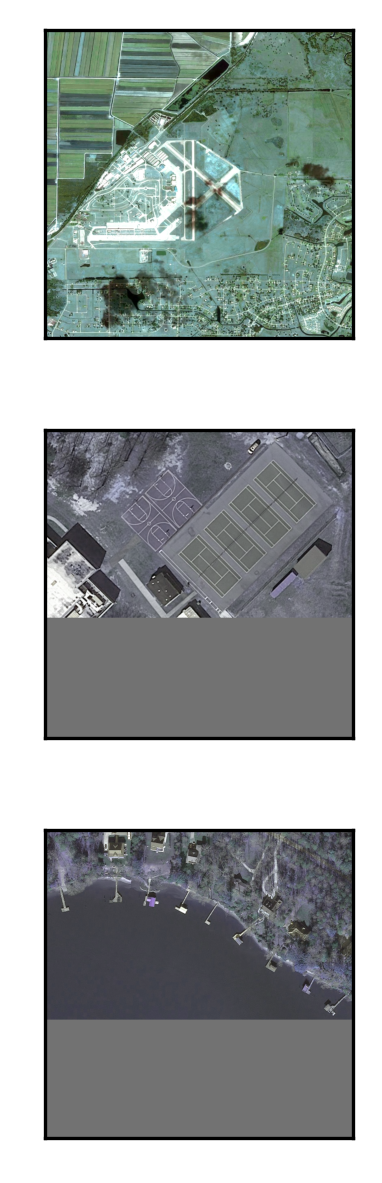

In [19]:
from avcv.visualize import plot_images, tensor2imgs
imgs = tensor2imgs(batch[0].cpu(), mode='bchw')
plot_images(imgs)

# Orientation prediction 

## Create model

In [11]:
trainer = Trainer(exp, args)

2021-08-12 09:05:13 | INFO     | yolox.core.trainer:136 - args: Config (path: None): {'experiment_name': 'nano-test', 'name': None, 'dist_backend': 'nccl', 'dist_url': None, 'batch_size': 4, 'devices': 1, 'local_rank': 0, 'exp_file': './exps/rotated/nano_dota.py', 'resume': False, 'debug': False, 'evaluate': False, 'ckpt': None, 'start_epoch': None, 'num_machines': 1, 'machine_rank': 0, 'fp16': False, 'occupy': False, 'opts': [], 'output_dir': './work_dir/None'}
2021-08-12 09:05:13 | INFO     | yolox.core.trainer:137 - exp value:
╒══════════════════╤════════════════════════════════════════════════════════════════════════════════╕
│ keys             │ values                                                                         │
╞══════════════════╪════════════════════════════════════════════════════════════════════════════════╡
│ seed             │ None                                                                           │
├──────────────────┼────────────────────────────────────

In [ ]:
trainer.before_train()

In [ ]:
trainer.epoch = 0
trainer.before_epoch()

In [ ]:
trainer.iter = 0

trainer.exp.print_interval= 1

In [ ]:
# trainer.before_iter()
# trainer.train_one_iter()
# trainer.after_iter()

In [ ]:

inps, targets = trainer.prefetcher.next()
inps = inps.to(trainer.data_type)
targets = targets.to(trainer.data_type)

In [ ]:
from tqdm import tqdm
pbar = range(1)

for i in pbar:
    trainer.before_iter()
    trainer.train_one_iter(inps, targets)
    trainer.after_iter()

In [ ]:
# with torch.no_grad():
#     targets.requires_grad = False
#     outputs = trainer.model(inps, targets)
#     loss = outputs["total_loss"]

In [ ]:
from PIL import Image
Image.open('test.jpg')